In [1]:
import s3fs
import xarray as xr
from datatree import open_datatree
import pyart
from dask_jobqueue import SLURMCluster
from dask.distributed import Client, progress
import warnings
warnings.filterwarnings('ignore')


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



In [2]:
fs = s3fs.S3FileSystem(anon=True,
                       client_kwargs=dict(endpoint_url="https://js2.jetstream-cloud.org:8001/")
                      )
fmap = s3fs.S3Map("pythia/test.zarr", 
                 s3=fs)

In [3]:
%%time
ds= open_datatree(fmap, engine='zarr', decode_times=False)

CPU times: user 4.89 s, sys: 184 ms, total: 5.07 s
Wall time: 17.5 s


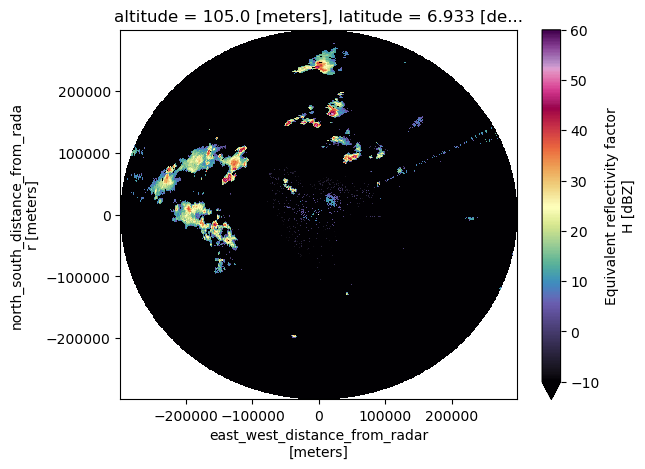

In [4]:
ds['sweep_0'].ds.DBZH.isel(times=0).plot(x='x', 
                                         y='y', 
                                         cmap='pyart_ChaseSpectral', 
                                         vmin=-10, 
                                         vmax=60)

In [9]:
print(f'size: {ds.nbytes / (1024 ** 3): .2f} GB')

size:  12.91 GB
